In [1]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 46kB/s 
     |████████████████████████████████| 4.3MB 39.2MB/s 
     |████████████████████████████████| 501kB 37.6MB/s 


In [0]:
 import tensorflow as tf
 from tensorflow import keras
 from tensorflow.keras import Sequential
 from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from tensorflow.keras import optimizers

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/DivyaVamjangi/Malaria-Prediction.git

Cloning into 'Malaria-Prediction'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 27569 (delta 0), reused 0 (delta 0), pack-reused 27566
Receiving objects: 100% (27569/27569), 331.64 MiB | 36.89 MiB/s, done.
Checking out files: 100% (27562/27562), done.


In [0]:
img_width = 64
img_heigth = 64

In [0]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [9]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Prediction/cell_images',
                                                   target_size = (64,64),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [10]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Prediction/cell_images',
                                                   target_size = (64,64),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [11]:
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [0]:
model = Sequential()

model.add(Conv2D(16,(3,3),input_shape = (img_width,img_heigth,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [0]:
model.compile(optimizers='adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [16]:
history = model.fit_generator(generator = train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1378/1378 [==============================] - 93s 68ms/step - loss: 0.5602 - accuracy: 0.7085 - val_loss: 0.3536 - val_accuracy: 0.9007
Epoch 2/5
1378/1378 [==============================] - 87s 63ms/step - loss: 0.2423 - accuracy: 0.9218 - val_loss: 0.2202 - val_accuracy: 0.9432
Epoch 3/5
1378/1378 [==============================] - 88s 64ms/step - loss: 0.2156 - accuracy: 0.9384 - val_loss: 0.2134 - val_accuracy: 0.9388
Epoch 4/5
1378/1378 [==============================] - 87s 63ms/step - loss: 0.2116 - accuracy: 0.9452 - val_loss: 0.3366 - val_accuracy: 0.9209
Epoch 5/5
1378/1378 [==============================] - 86s 63ms/step - loss: 0.2077 - accuracy: 0.9456 - val_loss: 0.2619 - val_accuracy: 0.9298


In [17]:
history.history

{'accuracy': [0.7084543, 0.92176163, 0.9384071, 0.9451651, 0.9456186],
 'loss': [0.5602494447785382,
  0.24233469515849657,
  0.21556251519275166,
  0.21155675799239168,
  0.20766358805147198],
 'val_accuracy': [0.90072596, 0.9431942, 0.9388385, 0.92087114, 0.9297641],
 'val_loss': [0.3536114229672197,
  0.2202070969062439,
  0.21336587516833908,
  0.33664977088354636,
  0.2619365502310836]}

In [0]:
def plot_learningCurve(history,epoch):
  #plot training & validation accuracy values
   epoch_range = range(1,epoch+1)
   plt.plot(epoch_range,history.history['accuracy'])
   plt.plot(epoch_range,history.history['val_accuracy'])
   plt.title('Model_Accuracy')
   plt.ylabel('Accuracy')
   plt.xlabel('Epoch')
   plt.legend(['Train','Val'],loc = 'upper left')
   plt.show()
#plot training & validtaion loss values
   plt.plot(epoch_range,history.history['loss'])
   plt.plot(epoch_range,history.history['val_loss'])
   plt.title('Model_loss')
   plt.ylabel('Loss')
   plt.xlabel('Epoch')
   plt.legend(['Train','Val'],loc = 'upper left')
   plt.show()

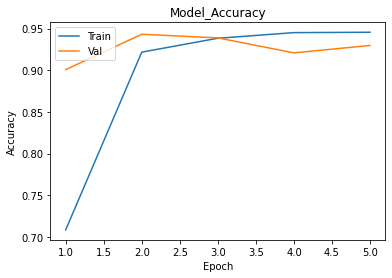

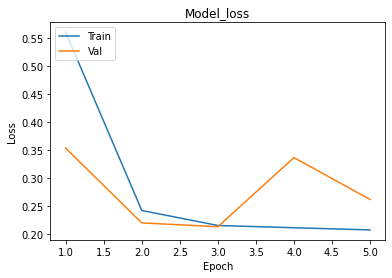

In [20]:
plot_learningCurve(history,5)